In [ ]:
# Load in libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Ensure directory exists
os.makedirs("visualisations", exist_ok=True)

In [74]:
# Load data
crash_facts = pd.read_excel("data/crash_fact_table.xlsx")
date_dimensions = pd.read_excel("data/date_dimension.xlsx")
location_dimensions = pd.read_excel("data/location_dimension.xlsx")

/tmp/ipykernel_4408/1195579796.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=crash_facts["Crash_Speed_Limit"], order=crash_facts["Crash_Speed_Limit"].value_counts().index, palette="viridis")


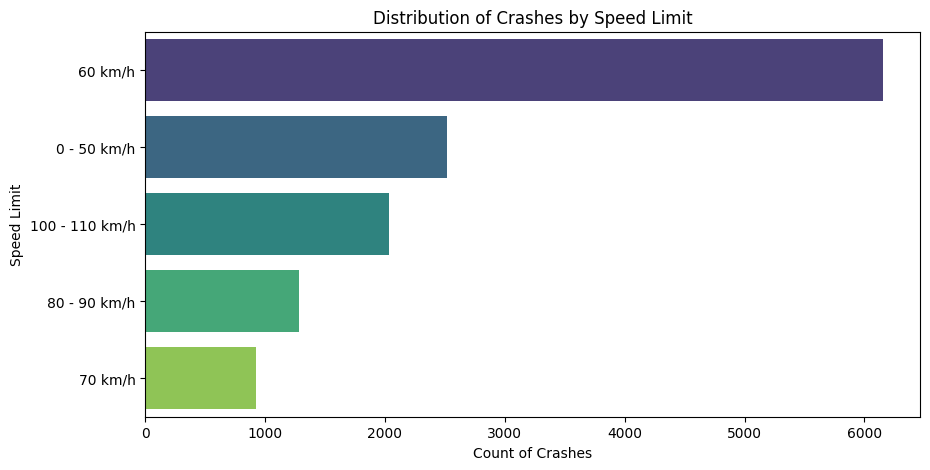

In [70]:
# Analysing the frequency of crashes in each speed zone (note that this doesnt account for the fact that more people drive in lower speed limit zones)
plt.figure(figsize=(10, 5))
sns.countplot(y=crash_facts["Crash_Speed_Limit"], order=crash_facts["Crash_Speed_Limit"].value_counts().index, palette="viridis")
plt.xlabel("Count of Crashes")
plt.ylabel("Speed Limit")
plt.title("Distribution of Crashes by Speed Limit")
plt.savefig("visualisations/crash_frequency.png")
plt.show()

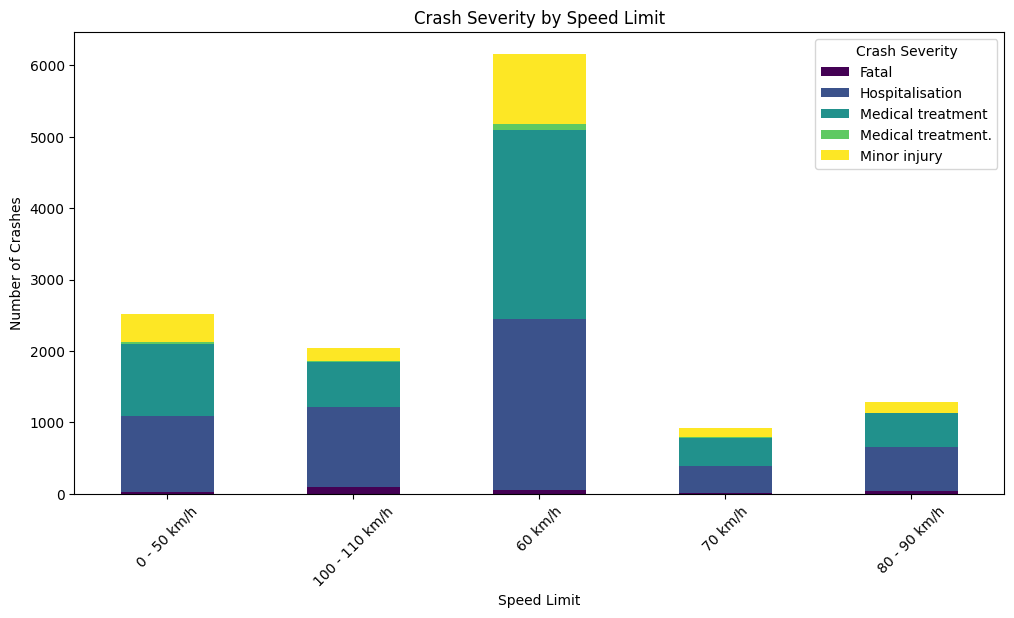

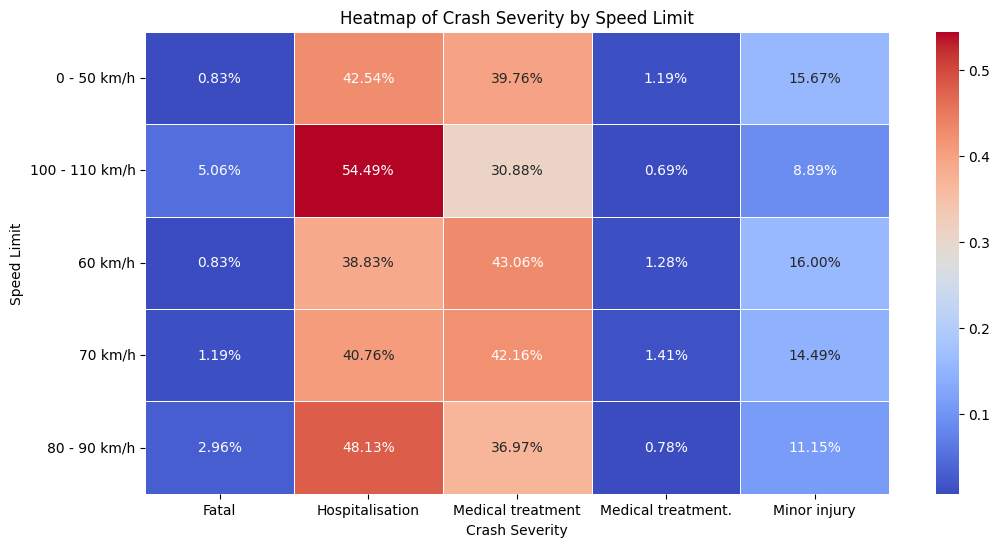

In [71]:
# Create pivot table for stacked bar chart
severity_counts = crash_facts.pivot_table(index="Crash_Speed_Limit", columns="Crash_Severity", aggfunc="size", fill_value=0)

# Plot
severity_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.xlabel("Speed Limit")
plt.ylabel("Number of Crashes")
plt.title("Crash Severity by Speed Limit")
plt.legend(title="Crash Severity")
plt.xticks(rotation=45)
plt.savefig("visualisations/severity_speed_bar.png")
plt.show()


# For the heatmap, normalise the data to remove bias of areas with more total crashes due to more traffic.
heatmap_data = severity_counts.div(severity_counts.sum(axis=1), axis=0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2%", cmap="coolwarm", linewidths=0.5)
plt.xlabel("Crash Severity")
plt.ylabel("Speed Limit")
plt.title("Heatmap of Crash Severity by Speed Limit")
plt.savefig("visualisations/severity_speed_heat.png")
plt.show()

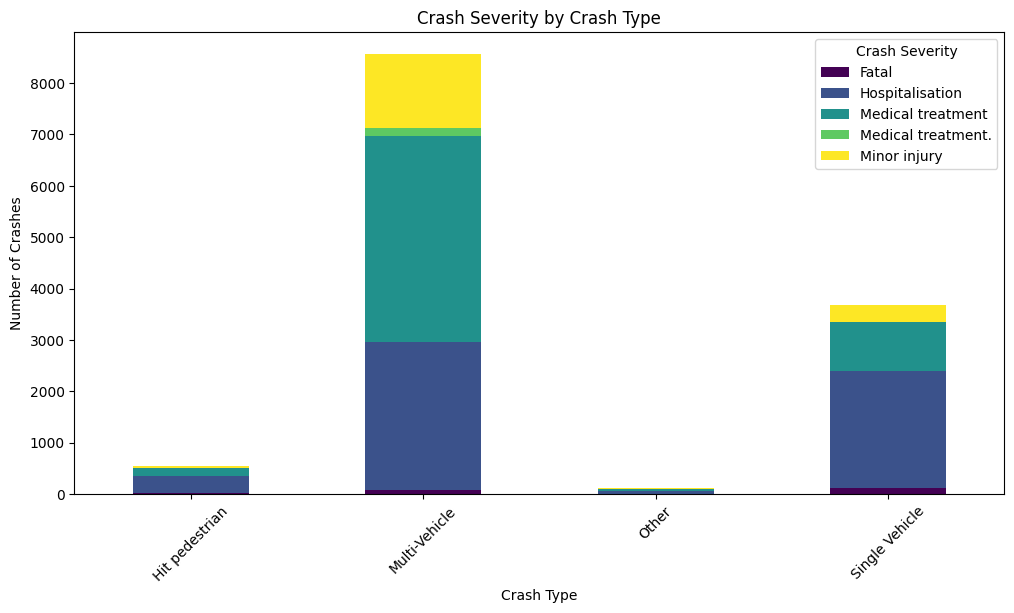

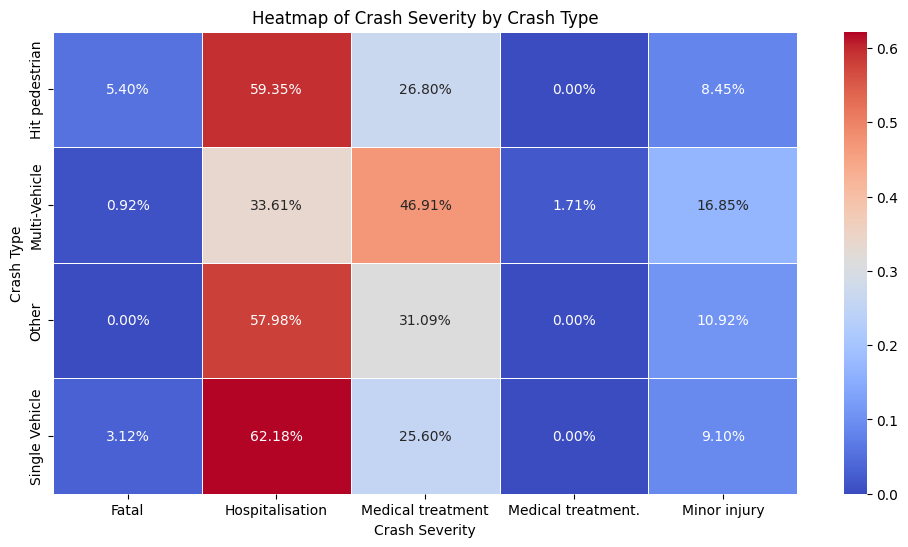

In [73]:
# The relationship between Crash Type and Crash Severity. For example, what types of crashes produce the most or least severe outcomes.
# Create pivot table for stacked bar chart
severity_counts = crash_facts.pivot_table(index="Crash_Type", columns="Crash_Severity", aggfunc="size", fill_value=0)

# Plot
severity_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")
plt.xlabel("Crash Type")
plt.ylabel("Number of Crashes")
plt.title("Crash Severity by Crash Type")
plt.legend(title="Crash Severity")
plt.xticks(rotation=45)
plt.savefig("visualisations/severity_type_bar.png")
plt.show()


# For the heatmap, normalise the data to remove bias of areas with more total crashes due to more traffic.
heatmap_data = severity_counts.div(severity_counts.sum(axis=1), axis=0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2%", cmap="coolwarm", linewidths=0.5)
plt.xlabel("Crash Severity")
plt.ylabel("Crash Type")
plt.title("Heatmap of Crash Severity by Crash Type")
plt.savefig("visualisations/severity_type_heat.png")
plt.show()

/tmp/ipykernel_4408/3811427321.py:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  monthly_crashes_pivot = monthly_crashes.pivot_table(index=['Crash_Month'], columns='Crash_Severity', values='crash_count', aggfunc='sum', fill_value=0)


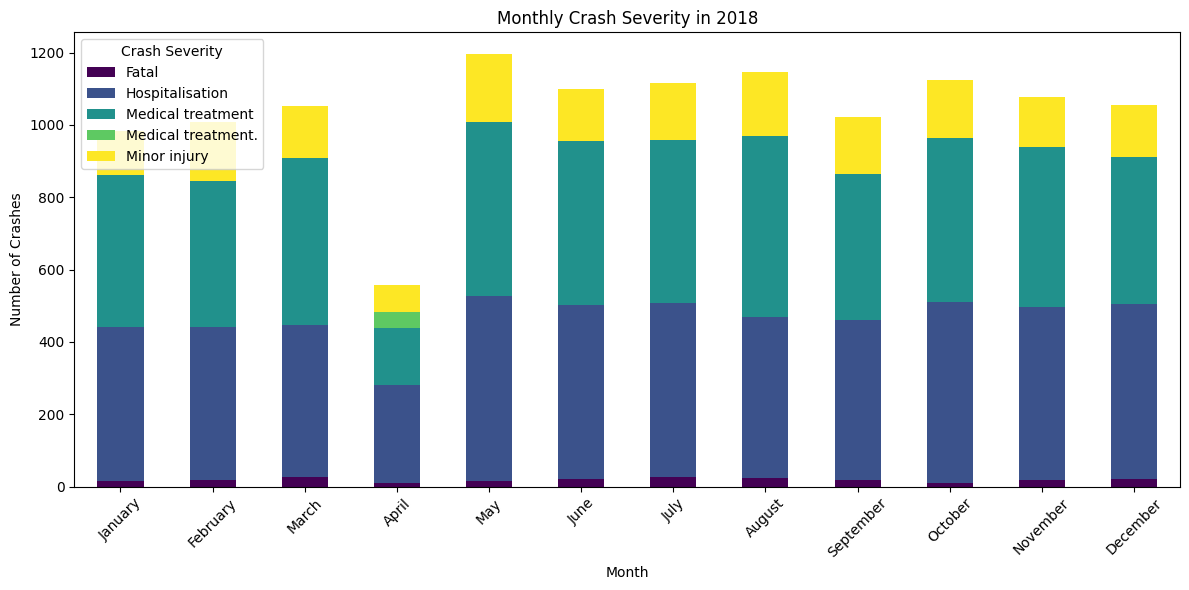

In [92]:
# Calculate the number of crashes (and their Crash Severity) for each month of 2018.

# Merge the two dataframes on 'date_key' to get year and month
merged_data = crash_facts.merge(date_dimensions[['Date_Key', 'Crash_Year', 'Crash_Month']], on='Date_Key', how='left')

# Filter data for 2018
merged_data_2018 = merged_data[merged_data['Crash_Year'] == 2018]

# Group by 'year', 'month' and 'Crash_Severity', and count the number of crashes
monthly_crashes = merged_data_2018.groupby(['Crash_Year', 'Crash_Month', 'Crash_Severity']).size().reset_index(name='crash_count')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_crashes['Crash_Month'] = pd.Categorical(monthly_crashes['Crash_Month'], categories=month_order, ordered=True)

# Create a pivot table to get the crash count by month and severity
monthly_crashes_pivot = monthly_crashes.pivot_table(index=['Crash_Month'], columns='Crash_Severity', values='crash_count', aggfunc='sum', fill_value=0)

# Plot stacked bar chart
monthly_crashes_pivot.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="viridis")

plt.title('Monthly Crash Severity in 2018')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.legend(title='Crash Severity')
plt.tight_layout()

# Save and display the plot
plt.savefig('visualisations/monthly_crash_severity.png')
plt.show()